In [2]:
from bs4 import BeautifulSoup
import json
import re

In [3]:
def split_and_update(person, delimiter, prev_section):
    split_content = person["content"].split(delimiter, 1)

    if len(split_content) == 1:
        print(person["mp"], "has no", prev_section, "data")
    else:
        person[prev_section] = split_content[0].replace("<strong>", "").replace("</strong>", "")
        person["content"] = split_content[1].replace("<strong>", "").replace("</strong>", "")

In [23]:
# read html content from members.html
with open('./main_html_file.html', 'r') as f:
    html_content = f.read()



html_content = html_content.replace("<p><strong>1. SHARES AND OTHER FINANCIAL INTERESTS </strong></p>", "<p><strong>SHARES AND OTHER FINANCIAL INTERESTS</strong></p>")
html_content = html_content.replace("<th><p><strong>Name of Company Number of Shares </strong></p></th><th></th>", "<th><p><strong>Name of Company</strong></p></th><th><p><strong>Number of Shares</strong></p></th>")


data = []


# split the content at each SHARES AND OTHER FINANCIAL INTERESTS
sections = html_content.split("<p><strong>SHARES AND OTHER FINANCIAL INTERESTS</strong></p>")

# loop through each section
for index, section in enumerate(sections):
    
    # skip the first section
    if index == 0:
        continue

    soup1 = BeautifulSoup(sections[index-1], 'html.parser')

    numbered_p = soup1.find('p', text=lambda t: t and re.match(r'^\d+\.\d+ ', t))

    last_strong = sections[index-1].rfind("<strong>")

    person_party = BeautifulSoup(sections[index-1][last_strong:], 'html.parser').text

    person = numbered_p.text

    person = re.sub("[0-9]+", "", person)
    person = person.replace(".", "")
    person = person.replace("MR ", "")
    person = person.replace("MRS ", "")
    person = person.replace("MS ", "")
    person = person.replace("DR ", "")
    person = person.replace("REVEREND ", "")
    person = person.replace("DOCTOR ", "")
    person = person.replace("ADVOCATE ", "")
    person = person.replace("MAJOR GENERAL ", "")
    person = person.replace("PRINCE ", "")
    person = person.replace(",", "")
    person = person.strip()

    person = person + " (" + person_party + ")"


    data.append({"mp": person, "content": section})



for person in data:

    person["RAW-SHARES AND OTHER FINANCIAL INTERESTS"] = ''
    person["SHARES AND OTHER FINANCIAL INTERESTS"] = []
    
    person["RAW-REMUNERATED EMPLOYMENT OUTSIDE PARLIAMENT"] =''
    person["REMUNERATED EMPLOYMENT OUTSIDE PARLIAMENT"] = []

    person["RAW-DIRECTORSHIP AND PARTNERSHIPS"] = ''
    person["DIRECTORSHIP AND PARTNERSHIPS"] = []

    person["RAW-CONSULTANCIES OR RETAINERSHIPS"] = ''
    person["CONSULTANCIES OR RETAINERSHIPS"] = []

    person["RAW-SPONSORSHIPS"] = ''
    person["SPONSORSHIPS"] = []

    person["RAW-GIFTS AND HOSPITALITY"] = ''
    person["GIFTS AND HOSPITALITY"] = []

    person["RAW-BENEFITS"] = ''
    person["BENEFITS"] = []

    person["RAW-LAND AND PROPERTY"] = ''
    person["LAND AND PROPERTY"] = []

    person["RAW-TRAVEL"] = ''
    person["TRAVEL"] = []

    person["RAW-PENSIONS"] = ''
    person["PENSIONS"] = []

    person["RAW-CONTRACTS"] = ''
    person["CONTRACTS"] = []

    person["RAW-TRUSTS"] = ''
    person["TRUSTS"] = []
    

    splits = [
        {
            "delimiter": "2. REMUNERATED EMPLOYMENT OR WORK OUTSIDE OF PARLIAMENT",
            "prev_section": "RAW-SHARES AND OTHER FINANCIAL INTERESTS"
        },
        {
            "delimiter": "3. DIRECTORSHIPS AND PARTNERSHIPS",
            "prev_section": "RAW-REMUNERATED EMPLOYMENT OUTSIDE PARLIAMENT"
        },
        {
            "delimiter": "4. CONSULTANCIES OR RETAINERSHIPS",
            "prev_section": "RAW-DIRECTORSHIP AND PARTNERSHIPS"
        },
        {
            "delimiter": "5. SPONSORSHIPS",
            "prev_section": "RAW-CONSULTANCIES OR RETAINERSHIPS"
        },
        {
            "delimiter": "6. GIFTS AND HOSPITALITY",
            "prev_section": "RAW-SPONSORSHIPS"
        },
        {
            "delimiter": "7. BENEFITS AND INTERESTS FREE LOANS",
            "prev_section": "RAW-GIFTS AND HOSPITALITY"
        },
        {
            "delimiter": "8. TRAVEL",
            "prev_section": "RAW-BENEFITS"
        },
        {
            "delimiter": "9. OWNERSHIP IN LAND AND PROPERTY",
            "prev_section": "RAW-TRAVEL"
        },
        {
            "delimiter": "10. PENSIONS",
            "prev_section": "RAW-LAND AND PROPERTY"
        },
        {
            "delimiter": "11. RENTED PROPERTY",
            "prev_section": "RAW-PENSIONS"
        },
        {
            "delimiter": "12. INCOME GENERATING ASSETS",
            "prev_section": "RAW-CONTRACTS"
        }
    ]

   
    for split_info in splits:
        split_and_update(person, split_info["delimiter"], split_info["prev_section"])

    # last one slightly different

    split = person["content"].split("13. TRUSTS")

    if len(split) == 1:
        print(person["mp"])
    else:
        person["RAW-CONTRACTS"] = split[0]
        person["RAW-TRUSTS"] = split[1]
        person["content"] = ''




/tmp/ipykernel_48589/2787789937.py:26: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  numbered_p = soup1.find('p', text=lambda t: t and re.match(r'^\d+\.\d+ ', t))


Meshoe Reverend Kenneth Raselabe Joseph (ACDP ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Swart Mr Steven Nicholas (ACDP ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Thring Reverend Wayne Maxim (ACDP ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Beesley Mr Alan David (ACTION SA ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
units (ACTION SA ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Letlape Doctor Tebogo Kgosietsile (ACTION SA ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Ngobeni Ms Lerato Mikateko (ACTION SA ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Trollip Mr Roland Athol Price (ACTION SA ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Hendricks Mr Mogamad Ganief Ebrahim (AL JAMA-AH ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Salie Advocate Shameemah (AL JAMA-AH ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Adams Mrs Rachel Cecilia (ANC ) has no RAW-DIRECTORSHIP AND PARTNERSHIPS data
Aphiri Ms Mokgadi Johanna (ANC ) has no RAW-DIRECTORSHIP AND PARTNERSHIP

In [24]:
def extract_section_data(section_name, column_names, person):
    soup = BeautifulSoup(person[f'RAW-{section_name.upper()}'], 'html.parser')
    section_data = []

    # find all the tables
    tables = soup.find_all('table')

    if len(tables) > 0:
        for table in tables:
            rows = table.find_all('tr')[1:]
            for row in rows:
                columns = row.find_all(['th', 'td'])

                # Append data to section_data
                data = {}
                for i, column in enumerate(columns[:len(column_names)]):
                    data[column_names[i]] = column.get_text(strip=True)
                section_data.append(data)

    person[section_name.upper()] = section_data

    # drop the raw data
    person.pop(f'RAW-{section_name.upper()}', None)


# Define sections and their column names
sections = [
    {
        "section_name": "SHARES AND OTHER FINANCIAL INTERESTS",
        "column_names": [
            "Name of Company",
            "Number of Shares",
            "Nature",
            "Nominal Value"
        ]
    },
    {
        "section_name": "REMUNERATED EMPLOYMENT OUTSIDE PARLIAMENT",
        "column_names": [
            "Name of Employer",
            "Type of Business"
        ]
    },
    {
        "section_name": "DIRECTORSHIP AND PARTNERSHIPS",
        "column_names": [
            "Directorship/Partnership in any Corporate Body",
            "Type of Business Activity",
        ]
    },
    {
        "section_name": "CONSULTANCIES OR RETAINERSHIPS",
        "column_names": [
            "Name of Organisation",
            "Type of Business Activity",
            "Value of any Benefits derived"
        ]
    },
    {
        "section_name": "SPONSORSHIPS",
        "column_names": [
            "Source of Sponsorship",
            "Description of Assistance/Sponsorship",
            "Extent"
        ]
    },
    {
        "section_name": "GIFTS AND HOSPITALITY",
        "column_names": [
            "Description",
            "Value",
            "Source"
        ]
    },
    {
        "section_name": "BENEFITS",
        "column_names": [
            "Source",
            "Description of Benefit",
        ]
    },
    {
        "section_name": "TRAVEL",
        "column_names": [
            "Sponsor", 
            "Description of Journey"
        ]
    },
    {
        "section_name": "LAND AND PROPERTY",
        "column_names": [
            "Description of Property",
            "Location-Area", 
            "Extent of the Property"
        ]
    },
    {
        "section_name": "PENSIONS",
        "column_names": [
            "Source", 
            "Public/Private"
        ]
    },
    {
        "section_name": "CONTRACTS",
        "column_names": [
            "Period of Contract",
            "Name of State  Entity",
            "Value of  Contract", 
            "Details of Contract and Management thereof"
        ]
    },
    {
        "section_name": "TRUSTS",
        "column_names": [
            "Name of Trust",
            "Registration Number", 
            "Trustee/Beneficiary", 
            "Details of benefits derived"
        ]
    }
    
]

{'mp': 'Meshoe Reverend Kenneth Raselabe Joseph (ACDP )', 'content': '', 'RAW-SHARES AND OTHER FINANCIAL INTERESTS': '<table><thead><tr><th><p>Name of  </p><p>Company</p></th><th><p>Number of  </p><p>Shares</p></th><th><p>Nature of Shares </p></th><th><p>Nominal Value</p></th></tr><tr><th><p>Sanlam </p></th><th><p>100 </p></th><th><p>Subscription  </p><p>shares</p></th><th><p>R15 000</p></th></tr></thead></table><p>', 'SHARES AND OTHER FINANCIAL INTERESTS': [], 'RAW-REMUNERATED EMPLOYMENT OUTSIDE PARLIAMENT': ' </p><table><thead><tr><th><p>Name of Employer or Business </p></th><th><p>Type of Employment or Work  Performed</p></th></tr><tr><th><p>Hope of Glory Tabernacle </p></th><th><p>Preacher- Church</p></th></tr></thead></table><p>', 'REMUNERATED EMPLOYMENT OUTSIDE PARLIAMENT': [], 'RAW-DIRECTORSHIP AND PARTNERSHIPS': '', 'DIRECTORSHIP AND PARTNERSHIPS': [], 'RAW-CONSULTANCIES OR RETAINERSHIPS': ' </p><table><thead><tr><th><p>Name of the Company or Partnership </p></th><th><p>Type of
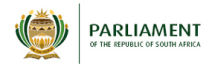
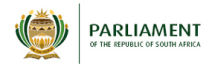
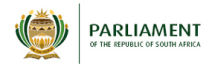
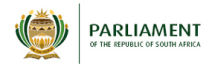
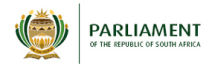
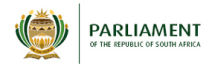
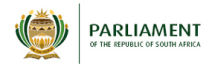
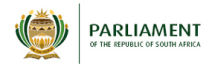
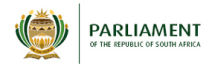
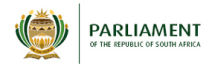
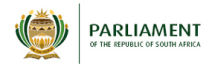
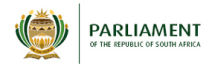
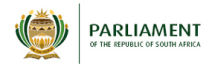
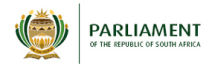
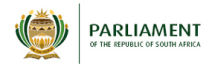
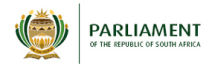
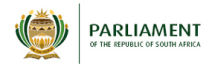
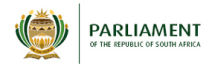
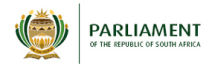
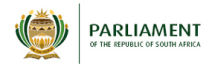
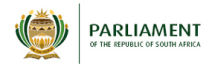
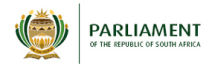
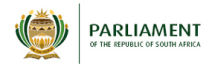
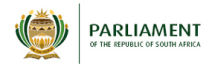
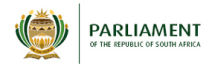
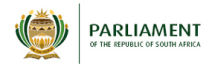
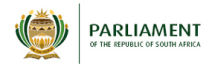
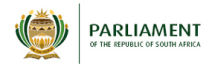
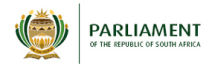
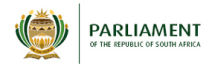
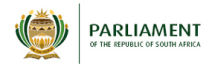
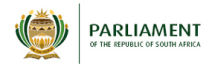
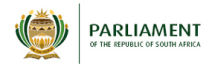
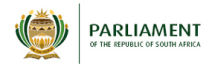
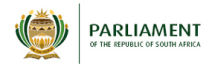
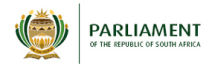
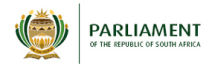
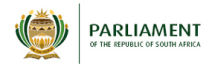
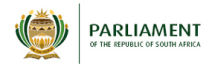
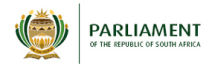
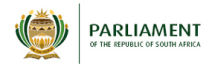
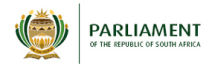
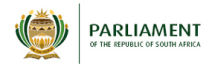
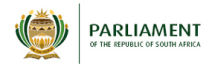
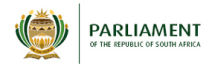
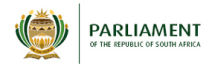
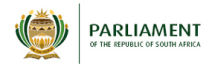
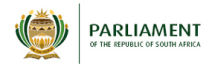
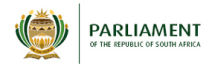
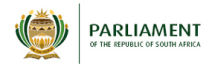
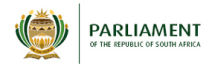
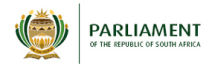
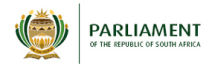
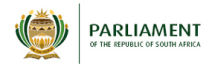
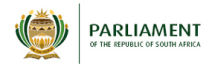
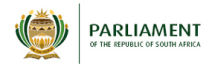
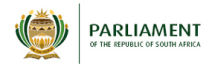
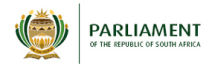
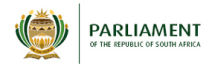
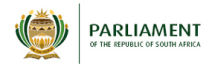
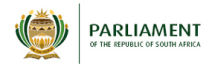
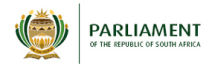
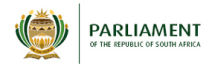
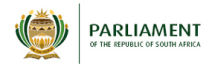
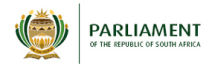
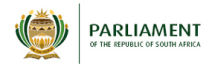
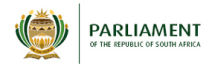
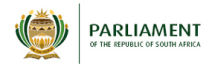
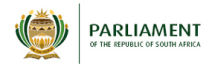
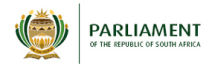
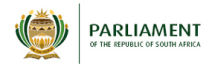
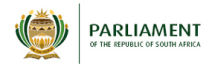
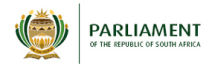
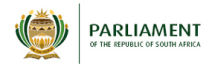
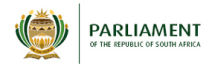
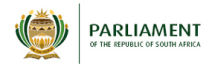
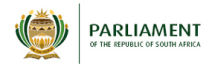
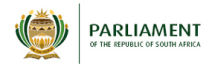
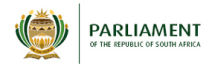
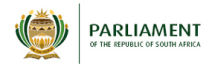
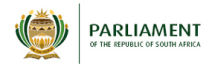
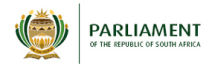
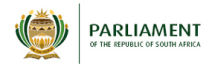
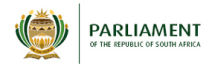
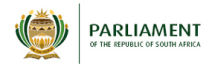
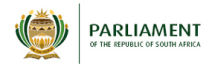
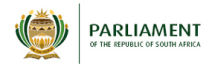
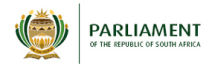
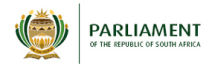
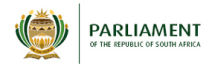
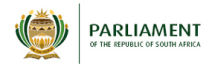
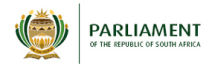
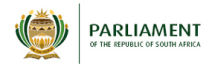
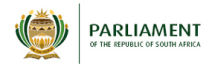
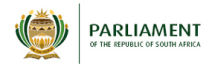
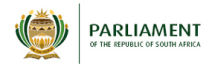
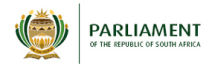
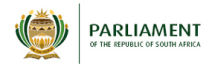
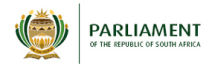
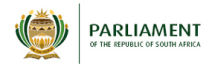
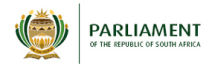
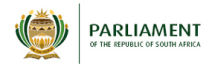
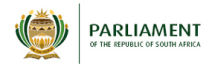
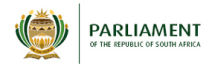
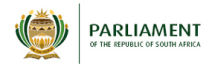
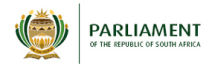
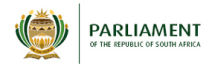
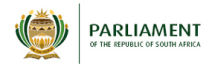
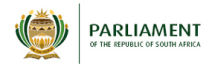
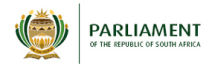
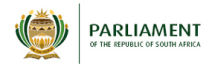
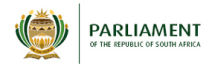
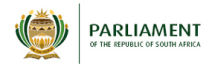
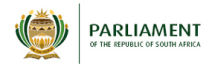

In [25]:
register = {
    "date": "2024-12-31", 
    "source": "https://www.parliament.gov.za/storage/app/media/Register%20of%20Members%20Interests/Register_of_Members_Interests_2024.pdf", 
    "register": [],
    "year": "2024"
}



for person in data:

    print(person)

    for section in sections:
        extract_section_data(section["section_name"], section["column_names"], person)    

    register["register"].append(person)
    
    

In [26]:
json_string = json.dumps(register, indent=4)
with open('register.json', 'w') as f:
    f.write(json_string)